<h2>Part I: Eye conditions and diseases among people</h2>
<br></br>
<h3>Introduction</h3>
<p>Eye-related conditions and diseases encompass a wide range of disorders that affect vision and overall eye health. These conditions, from common issues like refractive errors and cataracts to complex diseases such as glaucoma and age-related macular degeneration, can significantly impact quality of life. Early detection, diagnosis, and advancements in research are crucial for effective treatment and prevention, highlighting the importance of continuous study in the field of ophthalmology.</p>
<br></br>
<h3>Data set</h3>

In [1]:
from pandas import read_csv
import numpy as np

skip = [48,89,95,108,111,126,146,149,153,156,160,163,172,175,187,220,230,251,255,258,263,267,269,270,289,291,299,318,323,328,331,335] # rows where 1 subject participated multiple times according to the authors' words

data = read_csv('participants_info.csv', usecols=['age_years', 'sex', 'diagnosis1', 'diagnosis2', 'diagnosis3'], skiprows=skip)
read_csv('participants_info.csv', skiprows=skip)

,id_record,date,age_years,sex,diagnosis1,diagnosis2,diagnosis3,va_re_logMar,va_le_logMar,unilateral,rep_record,comments
0,1,2016-09-15,13,Male,Normal,NaN,NaN,-0.08,0.06,NaN,NaN,NaN
1,2,2005-09-15,13,Female,Congenital stationary night blindness,NaN,NaN,0.18,0.16,NaN,NaN,NaN
2,3,2019-08-08,49,Female,Orbital ischemia,Systemic disorder with ocular manifestations,NaN,0.26,0.00,NaN,Id:0329 - Id:0154 - Id:0049 - Id:0271,NaN
3,4,2004-12-16,43,Female,Retinitis pigmentosa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2016-07-13,47,Female,Normal,NaN,NaN,0.10,0.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
299,330,2003-07-16,43,Female,Normal,NaN,NaN,NaN,NaN,NaN,NaN,Alteration in visual acuity
300,332,2016-11-17,43,Male,Autoimmune retinopathy,Inflammatory disease,NaN,0.02,0.00,NaN,Id:0221 - Id:0252 - Id:0126,NaN
301,333,2015-01-14,4,Male,X linked retinoschisis,NaN,NaN,1.00,0.52,NaN,NaN,NaN
302,334,2021-08-28,14,Male,Normal,NaN,NaN,-0.10,-0.06,NaN,NaN,Family history of chorioretinopathy


<h2>Comments on data before describing it</h2>
<p>The data provides a very wide information on observations upon people's eyesight, and this gives us a plenty of interpretations we can extract from the set.</p>
<br></br>
<h2>Data Selection</h2>
<p>The dataset comprises information collected from 304 subjects enrolled at IOBA, a University of Valladolid-affiliated institution in Spain. The data collection spanned an extensive period, starting from 2003 and continuing until 2022. During this extended timeframe, 23 individuals had multiple visits: 19 individuals had two visits each, 1 individual had three, another had four visits and two subjects had five visits each. As a part of the routine clinical evaluation, all subjects underwent diagnosis by ophthalmology specialists. In this particular research multiple visits are not counted.</p>
<h2>Describing data</h2>
<h4>Population</h4>
<p>The participants are people from  Valladolid, Spain, who participated in the research from 2003 to 2022</p>
<h4>Size</h4>
<p>304 people</p>
<h4>Data description</h4>
<p>The data gives us a lot of information from sex and age to the number of visits. However, the main focus is on the age of the participant, their sex and whether their eyesight is normal or they have a certain number of diseases.</p>
<h4>Variables:</h4>
<h5>Variable AGE</h5>
<p>Variable name: AGE</p>
<p>Variable description: the variable is the age of a participant</p>
<p>Variable type: continuous</p>
<p>Range: [4,86]</p>
<h5>Variable SEX</h5>
<p>Variable name: SEX</p>
<p>Variable description: the variable is the sex of a participant</p>
<p>Variable type: categorical</p>
<p>Range: [Male,Female]</p>
<h5>Variable DISEASES</h5>
<p>Variable name: DISEASES</p>
<p>Variable description: the variable is the number of diseases a participant has</p>
<p>Variable type: discrete</p>
<p>Range: [0,3]</p>
<br></br>
<h2>Data for variable DISEASES</h2>
<h4>Where does the variable come from?</h4>
<p>The data shows the number of eye diseases for any subject. Diagnosis 'Normal' is considered as 0 diseases, others are considered 1,2 or 3 diseases if there are diagnosis1, diagnosis 2 or diagnosis3 respectfully (exception is diagnosis1: 'Normal' because it means a person has 0 eye diseases)</p>
<h4>Displaying data</h4>

In [2]:
data_diseases = data[['diagnosis1','diagnosis2','diagnosis3']].copy()
data_diseases.fillna(0, inplace=True)
x = np.array(data_diseases)
x[x == 'Normal'] = 0
x[x !=0] = 1
y = np.sum(x, axis = 1)
data['diseases'] = y
data = data[['age_years','sex','diseases']]
data.to_csv('newData.csv', index = False)
data

,age_years,sex,diseases
0,13,Male,0
1,13,Female,1
2,49,Female,2
3,43,Female,1
4,47,Female,0
...,...,...,...
299,43,Female,0
300,43,Male,2
301,4,Male,1
302,14,Male,0


<h2>Why is the data relevant?</h2>
<p>The set has many observations (300+). The set has a lot of columns, so it has much statistical series, which helps to identify the information, which is going to be to extracted clearly. The records were produced by the IOBA, a University of Valladolid-affiliated institution in Spain, so we can trust the source. All these make the conditions to observe the data sufficient.</p>
<br></br>
<h2>Flat view of the first lines (displayed below for convenience)</h2>

In [3]:
data[:10]

,age_years,sex,diseases
0,13,Male,0
1,13,Female,1
2,49,Female,2
3,43,Female,1
4,47,Female,0
5,20,Male,1
6,43,Male,0
7,10,Female,3
8,13,Male,1
9,35,Female,1


<p>As we see from the data, we have participants of different age and sex. Some of them have a normal eyesight, some have up to 3 diseases. The data is not processed, and we cannot make any conclusions for the time now, but we see that the observations are satisfying in terms of information.</p>
<br></br>
<h2>Source of data</h2>
<h4>Title of the publication</h4>
<p>A Comprehensive Dataset of Pattern Electroretinograms for Ocular Electrophysiology Research: The PERG-IOBA Dataset</p>
<h4>Link</h4>
<p>https://doi.org/10.13026/d24m-w054.</p>
<h4>Authors and theme</h4>
<p>Fernández, I., Cuadrado Asensio, R., Larriba, Y., Rueda, C., & Coco-Martin, R. M. (2024). A Comprehensive Dataset of Pattern Electroretinograms for Ocular Electrophysiology Research: The PERG-IOBA Dataset (version 1.0.0). PhysioNet.</p>
<h4>Also standard citation for PhysioNet</h4>
<p>Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.</p>
<h4>Publication</h4>
<p>Published: Jan. 19, 2024. Version: 1.0.0</p>


<br></br>
<br></br>
<h2>Part II: Analysis of the variables introduced and described in Part I</h2>

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
from scipy import stats

data = pd.read_csv('newData.csv')
data.head()

,age_years,sex,diseases
0,13,Male,0
1,13,Female,1
2,49,Female,2
3,43,Female,1
4,47,Female,0


<h2>Analyzing variable SEX</h2>

In [5]:
x = np.array(data['sex'])
levels, ni = np.unique(x, return_counts=True)
n = sum(ni)
fi = ni/n
ft_sex = pd.DataFrame(data=np.transpose([ni,fi]),index=levels,columns=['frequency', 'relative frequency'])
ft_sex.to_csv('table_sex.csv')
ft_sex

,frequency,relative frequency
Female,155.0,0.509868
Male,149.0,0.490132


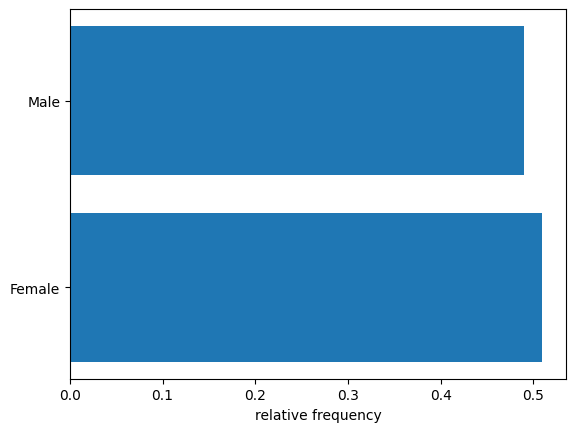

In [6]:
import matplotlib.pyplot as plt
plt.barh(ft_sex.index, fi)
plt.xlabel('relative frequency')
plt.show()

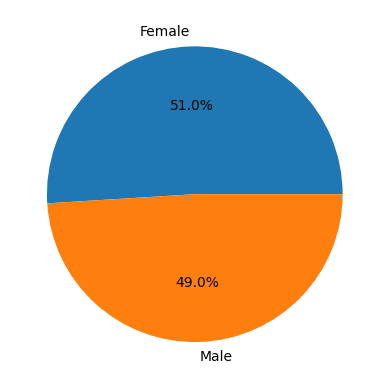

In [7]:
plt.pie(ni, labels = ft_sex.index, autopct='%1.1f%%')
plt.show()

In [8]:
f'The mode is {levels[np.argmax(ni)]}'

'The mode is Female'

<h2>Interpretation</h2>
<p>As evident from the table and graphical representations, the proportions of male and female subjects in the analysis are nearly equal, with females making up a slight majority, being just 2% more prevalent.</p>

<br></br>
<h2>Analyzing variable DISEASES</h2>

In [9]:
x = np.array(data['diseases'])
levels, ni = np.unique(x, return_counts=True)
n = sum(ni)
fi = ni/n
Fi = np.cumsum(fi)
ft_diseases = pd.DataFrame(data=np.transpose([ni,fi, Fi]),index=levels,columns=['frequency', 'relative frequency', 'cumulative frequency'])
ft_diseases.to_csv('table_diseases.csv')
ft_diseases

,frequency,relative frequency,cumulative frequency
0,94.0,0.309211,0.309211
1,126.0,0.414474,0.723684
2,73.0,0.240132,0.963816
3,11.0,0.036184,1.000000


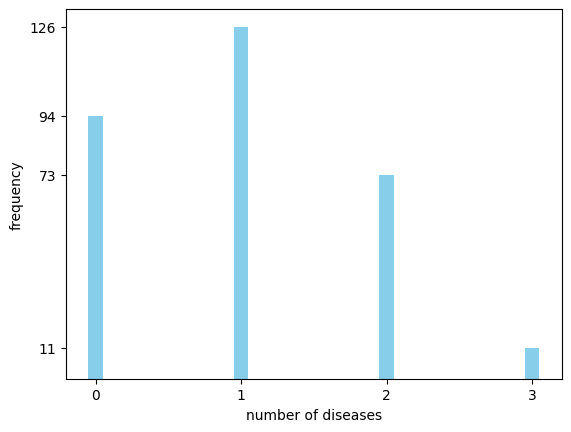

In [10]:
plt.bar(ft_diseases.index, ni, width=0.1, color='skyblue')
plt.ylabel('frequency')
plt.xlabel('number of diseases')
plt.xticks(ft_diseases.index)
plt.yticks(ni)
plt.show()

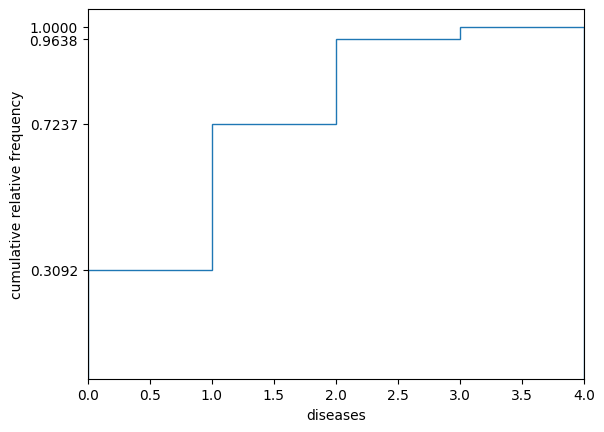

In [11]:
Fi_comp = np.insert(Fi, 0, 0)
edges = np.insert(ft_diseases.index, 0, 0)
edges = np.append(edges, 4)
plt.stairs(Fi_comp,edges)
plt.xlim(0,4)
plt.yticks(Fi)
plt.ylabel('cumulative relative frequency')
plt.xlabel('diseases')
plt.show()

In [12]:
mean_diseases = np.mean(data['diseases'])
f"The mean number of diseases is {mean_diseases}"

'The mean number of diseases is 1.0032894736842106'

In [13]:
median_diseases = np.median(data['diseases'])
f"The median number of diseases is {median_diseases}"

'The median number of diseases is 1.0'

In [14]:
variance_diseases = np.var(data['diseases'])
f"The variance of diseases is {variance_diseases}"

'The variance of diseases is 0.6940681267313019'

In [15]:
std_diseases = np.std(data['diseases'])
f"The standard deviation of diseases is {std_diseases}"

'The standard deviation of diseases is 0.8331075121083125'

In [16]:
skew_diseases = skew(data['diseases'])
diseases_vector = np.array(data['diseases'])
skew_diseases_check = sum(((diseases_vector - mean_diseases)/std_diseases)**3) / len(diseases_vector)

assert round(skew_diseases_check, 12) == round(skew_diseases, 12)

f"The skewness of diseases is {skew_diseases}"

'The skewness of diseases is 0.36930650443996277'

In [17]:
kurt_diseases = kurtosis(data['diseases'])
diseases_vector = np.array(data['diseases'])
kurt_diseases_check = sum(((diseases_vector - mean_diseases)/std_diseases)**4) / len(diseases_vector) - 3

assert round(kurt_diseases_check, 12) == round(kurt_diseases, 12)

f"The kurtosis of diseases is {kurt_diseases}"

'The kurtosis of diseases is -0.6637674922948209'

<h2>Interpretation</h2>
<p>The graphs and the table reveal that the distribution of diseases in the dataset is heavily concentrated in the lower ranges, with the majority of individuals having 1 or 0 diseases.

Specifically:
About 30.92% of individuals have no diseases.
By the time we reach 1 disease, approximately 72.37% of the data is accounted for, and 96.38% by 2 diseases.
The number of individuals with 3 is quite small.

The population is mostly composed of individuals with fewer diseases, with a relatively small portion of the population experiencing more severe cases.</p>

<br></br>
<h2>Analyzing variable AGE</h2>

In [18]:
x = np.array(data['age_years'])
bins = np.array([  0., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 70., 100.])
ni = np.histogram(x, bins = bins)[0]
lo = bins[:-1]
hi = bins[1:]
n = sum(ni)
fi = ni/n
Fi = np.cumsum(fi)
ft_age = pd.DataFrame(data=np.transpose([lo, hi, ni,fi, Fi]),columns=['lo', 'hi', 'frequency', 'relative frequency', 'cumulative frequency'])
ft_age.to_csv('table_age.csv')
ft_age

,lo,hi,frequency,relative frequency,cumulative frequency
0,0.0,10.0,23.0,0.075658,0.075658
1,10.0,15.0,23.0,0.075658,0.151316
2,15.0,20.0,26.0,0.085526,0.236842
3,20.0,25.0,19.0,0.062500,0.299342
4,25.0,30.0,17.0,0.055921,0.355263
5,30.0,35.0,21.0,0.069079,0.424342
6,35.0,40.0,34.0,0.111842,0.536184
7,40.0,45.0,24.0,0.078947,0.615132
8,45.0,50.0,30.0,0.098684,0.713816
9,50.0,55.0,32.0,0.105263,0.819079


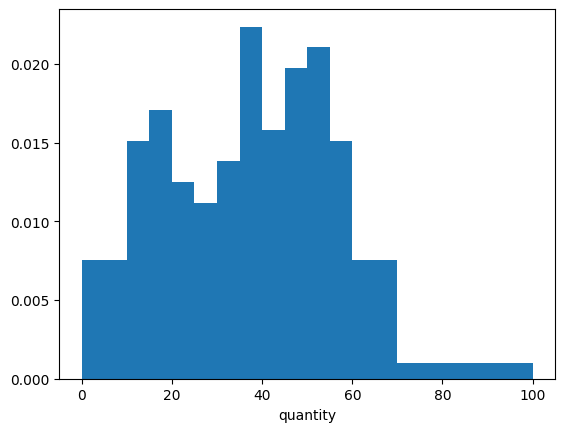

In [19]:
width = hi-lo
height = fi/width
bin_edges = np.append(lo,hi[-1])
plt.hist(bin_edges[:-1], bins = bin_edges, weights = height) 
plt.xlabel('quantity')
plt.show()

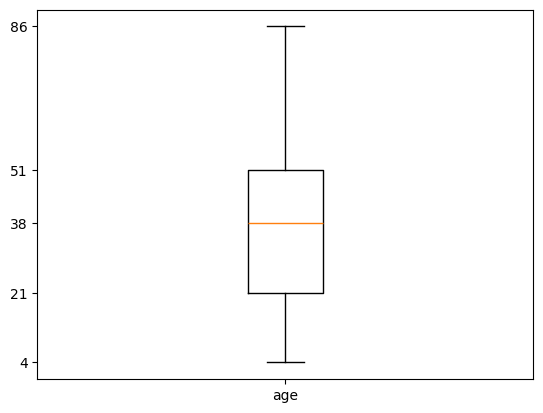

In [20]:
plt.boxplot(x)
alpha=[0, 0.25,0.5,0.75, 1]
quantiles = np.quantile(x,alpha, method = 'inverted_cdf')
plt.yticks(quantiles)
plt.xticks([1],['age'])
plt.show()

In [21]:
mean_age = np.mean(data['age_years'])
f"The mean age is {mean_age}"

'The mean age is 37.08552631578947'

In [22]:
median_age = np.median(data['age_years'])
f"The median age is {median_age}"

'The median age is 38.0'

In [23]:
variance_age = np.var(data['age_years'])
f"The variance of age is {variance_age}"

'The variance of age is 335.8742641966759'

In [24]:
std_age = np.std(data['age_years'])
f"The standard deviation of age is {std_age}"

'The standard deviation of age is 18.326872733684706'

In [25]:
skew_age = skew(data['age_years'])
age_vector = np.array(data['age_years'])
skew_age_check = sum(((age_vector - mean_age)/std_age)**3) / len(age_vector)

assert round(skew_age_check, 12) == round(skew_age, 12)

f"The skewness of age is {skew_age}"

'The skewness of age is 0.08352232338185928'

In [26]:
kurt_age = kurtosis(data['age_years'])
age_vector = np.array(data['age_years'])
kurt_age_check = sum(((age_vector - mean_age)/std_age)**4) / len(age_vector) - 3

assert round(kurt_age_check, 12) == round(kurt_age, 12)

f"The kurtosis of age is {kurt_age}"

'The kurtosis of age is -0.7229877452065159'

<h2>Interpretation</h2>
<p>The age distribution in this dataset shows a fairly balanced spread, with most individuals falling between 20 and 56 years old. The data captures a wide range of ages, from infants to older adults.</p>

<br></br>
<h2>General conclusion</h2>
<p>People of all ages and genders face optical diseases, 30% of whom have more than 1 visual issue. The problem of bad eyesight is still relevant regardless of the human breakthroughs in many fields and the improvement of the quality of life. There is a lot of space for further studies. For instance, this analysis gives no certainty about the existence of any correlation between eyesight and age or even gender. It could be also useful to make some predictions on the future of the problem. It is not clear if the situation becomes worse within years. If younger generation has more eye diseases, this may turn into the trend of increasing eyesight problems.</p>

<br></br>
<br></br>
<h2>Part III: Confidence intervals</h2>

<p>CI for the mean of variable AGE</p>
<p>We are interested to understand how old can be the typical unit. For this we construct a two-sided confidence interval at a confidence level of 90%.</p>
<p>Because the sample is large, we can use the N(0,1)        distribution: the confidence interval is (x - t, x + t), where the margin of error t is given by t = u*std/sqrt(n) where alpha = 1-0.9 and u is the 1-alpha/2 quantile of the N(0,1)distribution:</p>  

In [27]:
alpha = 0.1
u = stats.norm.ppf(1-alpha/2)
t = u*std_age/np.sqrt(len(data))
f'The mean of age of a unit is ({mean_age-t:.2f}, {mean_age+t:.2f}) with confidence level 90%'

'The mean of age of a unit is (35.36, 38.81) with confidence level 90%'

<p>CI for the variance of variable AGE does not exist. There are no confidence interval for the variance in the non Gaussian case.</p>

<p>CI for the proportion of variable DISEASES (for value 1)</p>
<p>We make a confidence interval for the probability of having 1 disease. The estimated proportion (point estimate) is p = 0.4144736842105263 and we give a 95% estimate of this proportion.</p>
<p>Since the sample is large enough (n = 304), the confidence interval is (p - t, p + t) where the margin of error t is given by t = u * sqrt(p0(1-p0))/sqrt(n), alpha = 1-0.95 and u is the 1-alpha/2 quantile of the N(0,1) distribution:</p>

In [28]:
p = np.mean(np.array(data['diseases']) == 1)
p_ci_dis = (p - u * (p * (1 - p) / len(data))**0.5, 
           p + u * (p * (1 - p) / len(data))**0.5)

f'the proportion of units with 1 disease is in ({round(p_ci_dis[0],4)},{round(p_ci_dis[1],4)}) with confidence level 95%'

'the proportion of units with 1 disease is in (0.368,0.4609) with confidence level 95%'

<br></br>
<br></br>
<h2>Part IV: Goodness-of-fit tests</h2>

<p>The variable DISEASES (representing a range 0-3) is a count. Potential distribution to consider is Poisson distribution or Binomial distribution.</p>
<p>We choose the most widely used significance level 0.05. The null hypothesis is "Data fits the specific distribution".</p>

<h3>Fitting to Poisson distribution</h3>

In [29]:
from scipy.stats import poisson, binom, chisquare

freq_dis = ft_diseases['frequency']
observations = len(data)

Expected distribution frequencies

In [30]:
expected_poisson = np.array([observations * poisson.pmf(k, mean_diseases) for k in range(4)])

# Fitting the total frequency sums to equal ones
expected_poisson = sum(freq_dis) / sum(expected_poisson) * expected_poisson

expected_poisson

array([113.64905835, 114.02290394,  57.19898964,  19.12904807])

Test

In [31]:
chi2_poisson, p_poisson_val = chisquare(freq_dis, expected_poisson)

p_poisson_val

0.005921847922425107

Graphically

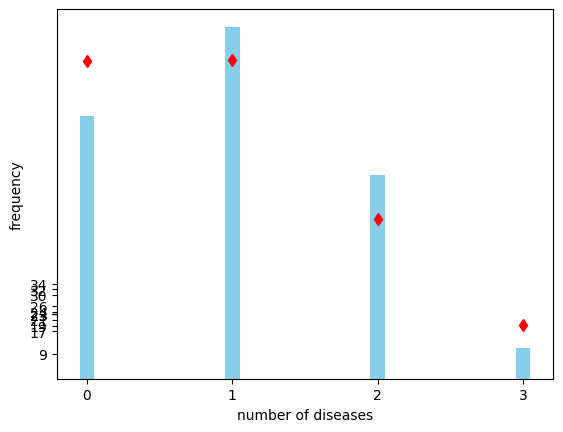

In [32]:
plt.bar(ft_diseases.index, freq_dis, width=0.1, color='skyblue')
plt.ylabel('frequency')
plt.xlabel('number of diseases')
plt.xticks(ft_diseases.index)
plt.yticks(ni)
plt.plot(ft_diseases.index, expected_poisson, 'd', color='red')
plt.show()

Decision

Reject the null hypothesis as the p-value is significantly lower than the significance level

<h3>Fitting to Binomial distribution</h3>

In [33]:
n_binom = 3
p_binom = mean_diseases / n_binom

Expected distribution frequencies

In [34]:
expected_binomial = [observations * binom.pmf(k, n_binom, p_binom) for k in range(4)]

expected_binomial

[89.63036022301739, 135.1100158221761, 67.88888768659591, 11.370736268210733]

Test

In [35]:
chi2_binom, p_binom_val = chisquare(freq_dis, expected_binomial)

p_binom_val

0.7472132207809765

Graphically

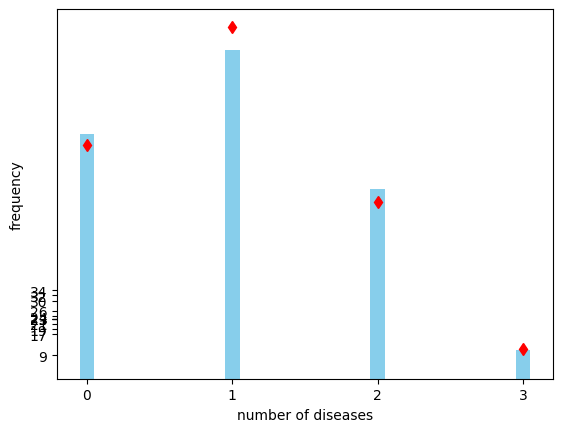

In [36]:
plt.bar(ft_diseases.index, freq_dis, width=0.1, color='skyblue')
plt.ylabel('frequency')
plt.xlabel('number of diseases')
plt.xticks(ft_diseases.index)
plt.yticks(ni)
plt.plot(ft_diseases.index, expected_binomial, 'd', color='red')
plt.show()

Decision

We fail to reject the null hypothesis. We consider the distribution to be the Poisson distribution

<h3>From the tests we can conclude that we face with a Binomial distribution</h3>

<br></br>
<br></br>
<h2>Part V: More Hypothesis tests</h2>

A chi-squared test to compare samples

We can compare the distribution of diseases for males and females. If the distributions are different, it will make further analysis more difficult so we hope to see that the distributions are not significantly different, which means to have a p-value larger that 0.05

In [37]:
data_m = data[data['sex'] == 'Male']
data_m

,age_years,sex,diseases
0,13,Male,0
5,20,Male,1
6,43,Male,0
8,13,Male,1
15,12,Male,3
...,...,...,...
295,61,Male,1
296,40,Male,0
300,43,Male,2
301,4,Male,1


In [38]:
data_f = data[data['sex'] == 'Female']
data_f

,age_years,sex,diseases
1,13,Female,1
2,49,Female,2
3,43,Female,1
4,47,Female,0
7,10,Female,3
...,...,...,...
293,50,Female,1
297,24,Female,0
298,44,Female,2
299,43,Female,0


In [39]:
x_m = np.array(data_m['diseases'])
levels_m, ni_m = np.unique(x_m, return_counts=True)
ni_m

array([49, 68, 27,  5])

In [40]:
x_f = np.array(data_f['diseases'])
levels_f, ni_f = np.unique(x_f, return_counts=True)
ni_f

array([45, 58, 46,  6])

We can notice that the frequencies for the third value differ in approximately 2 times

In [41]:
nkj = np.vstack((ni_m, ni_f))
nk = np.sum(nkj, axis = 1)
nj = np.sum(nkj, axis = 0)
ddl = (np.shape(nkj)[0]-1)*(np.shape(nkj)[1]-1)
nkj, nk, nj, ddl

(array([[49, 68, 27,  5],
        [45, 58, 46,  6]]),
 array([149, 155]),
 array([ 94, 126,  73,  11]),
 3)

The chi-squared statistic

In [42]:
nkj_th = np.tensordot(nk,nj, axes = 0)/observations
dkj = (nkj- nkj_th)**2/nkj_th
d2 =  np.sum(dkj)
d2

5.88384908918869

The p-value

In [43]:
p_value =stats.chi2.sf(d2, ddl)
p_value

0.11740001080513573

The p-value is bigger than the significance level (0.117 >> 0.05), so the distributions are approximately equal. It means that there is no factor which influences the distribution according to the gender

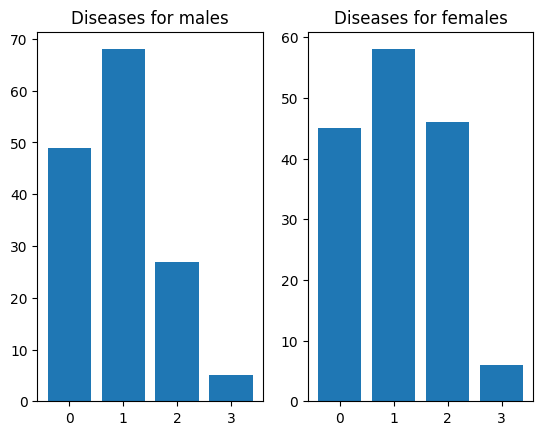

In [44]:
plt.subplot(1,2,1)
plt.bar(ft_diseases.index, ni_m)
plt.title('Diseases for males')
plt.subplot(1,2,2)
plt.bar(ft_diseases.index, ni_f)
plt.title('Diseases for females')
plt.show()

A parametric test to compare the means of two samples

In [45]:
bx, sx2, nx = np.mean(ni_m), np.var(ni_m), len(ni_m)
by, sy2, ny = np.mean(ni_f), np.var(ni_f), len(ni_f)
t = (bx-by)*np.sqrt(observations-2)/np.sqrt((nx-1)*sx2+(ny-1)*sy2)/np.sqrt(1/nx+1/ny)
p_value = 2*stats.t.sf(np.abs(t), observations-2)
p_value

0.48829207176506306

We fail to reject the equality of means

<h2>Conclusion</h2>

The notebook explores data on eye conditions and diseases from a dataset collected between 2003 and 2022 at IOBA, a University of Valladolid-affiliated institution in Spain. The analysis focuses on the number of detected eye diseases among people of all ages and genders.

Key concepts:

Dataset overview:
The dataset includes 304 participants, with variables such as age (continuous, ranging from 4 to 86 years), sex (categorical, Male/Female), and the number of eye diseases (discrete, ranging from 0 to 3).
Diagnoses are detailed, including "Normal" (0 diseases) and up to three specific diagnoses for some participants.

Sample characteristics:
The dataset has a nearly even distribution of male and female participants (Male: ~49%, Female: ~51%).
A significant proportion of participants  1 eye disease (in the population).

Data relevance:
The dataset provides insights due to its size and diversity, making it highly valuable for understanding patterns in eye health and disease prevalence across different demographics.
Its credibility is supported by its source, a published dataset designed for ophthalmology research.

Insights from analysis:

Age and eye diseases: There is no confidence and no correlation test between age and diseases.

Sex and diseases: There is no indication of a significant difference in the number of diseases between males and females.

Dataset quality: The data is well-structured, with clear documentation of variables, making it suitable for a deeper statistical analysis.

Conclusion:
The dataset effectively captures the dynamics of eye health among a diverse population over nearly two decades. It demonstrates that while many participants maintain normal vision, there is a plenty of those who struggle from 1 or more optical issues. The study underscores the importance of managing eye health. This dataset can serve as a benchmark for further research in ophthalmology.